### Spotify Documentation
- https://spotipy.readthedocs.io/en/2.19.0/#examples
- IDs URIs and URLs

In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
from dotenv import load_dotenv
import json

load_dotenv()

True

In [5]:
client_id = os.getenv("client_id")
client_secret = os.getenv("client_secret")
#SPOTIPY_REDIRECT_URI='your-app-redirect-url'

In [6]:
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

# Searching Tracks

In [7]:
results = sp.search(q='track:'+'baby',type='track')

In [8]:
results['tracks']

{'href': 'https://api.spotify.com/v1/search?query=track%3Ababy&type=track&offset=0&limit=10',
 'items': [{'album': {'album_group': 'album',
    'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5f7VJjfbwm532GiveGC0ZK'},
      'href': 'https://api.spotify.com/v1/artists/5f7VJjfbwm532GiveGC0ZK',
      'id': '5f7VJjfbwm532GiveGC0ZK',
      'name': 'Lil Baby',
      'type': 'artist',
      'uri': 'spotify:artist:5f7VJjfbwm532GiveGC0ZK'},
     {'external_urls': {'spotify': 'https://open.spotify.com/artist/2hlmm7s2ICUX0LVIhVFlZQ'},
      'href': 'https://api.spotify.com/v1/artists/2hlmm7s2ICUX0LVIhVFlZQ',
      'id': '2hlmm7s2ICUX0LVIhVFlZQ',
      'name': 'Gunna',
      'type': 'artist',
      'uri': 'spotify:artist:2hlmm7s2ICUX0LVIhVFlZQ'}],
    'available_markets': ['AD',
     'AE',
     'AG',
     'AL',
     'AM',
     'AO',
     'AR',
     'AT',
     'AU',
     'AZ',
     'BA',
     'BB',
     'BD',
     'BE',
     'BG',
     'BH',
   

In [9]:
print(len(results['tracks']))

7


In [10]:
results['tracks']['items']

[{'album': {'album_group': 'album',
   'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5f7VJjfbwm532GiveGC0ZK'},
     'href': 'https://api.spotify.com/v1/artists/5f7VJjfbwm532GiveGC0ZK',
     'id': '5f7VJjfbwm532GiveGC0ZK',
     'name': 'Lil Baby',
     'type': 'artist',
     'uri': 'spotify:artist:5f7VJjfbwm532GiveGC0ZK'},
    {'external_urls': {'spotify': 'https://open.spotify.com/artist/2hlmm7s2ICUX0LVIhVFlZQ'},
     'href': 'https://api.spotify.com/v1/artists/2hlmm7s2ICUX0LVIhVFlZQ',
     'id': '2hlmm7s2ICUX0LVIhVFlZQ',
     'name': 'Gunna',
     'type': 'artist',
     'uri': 'spotify:artist:2hlmm7s2ICUX0LVIhVFlZQ'}],
   'available_markets': ['AD',
    'AE',
    'AG',
    'AL',
    'AM',
    'AO',
    'AR',
    'AT',
    'AU',
    'AZ',
    'BA',
    'BB',
    'BD',
    'BE',
    'BG',
    'BH',
    'BI',
    'BJ',
    'BO',
    'BR',
    'BS',
    'BT',
    'BW',
    'BY',
    'BZ',
    'CA',
    'CD',
    'CG',
    'CH',
    'C

In [11]:
items_in_tracks = results['tracks']['items']
if len(items_in_tracks) > 0:
    for item in items_in_tracks:
        print(item['name'] + " - By - " + item['artists'][0]['name'])
        print("Track ID: " + item['id'] + " / Artist ID - " + item['artists'][0]['id'])
        print("------")

Drip Too Hard (Lil Baby & Gunna) - By - Lil Baby
Track ID: 78QR3Wp35dqAhFEc2qAGjE / Artist ID - 5f7VJjfbwm532GiveGC0ZK
------
Wants and Needs (feat. Lil Baby) - By - Drake
Track ID: 65OVbaJR5O1RmwOQx0875b / Artist ID - 3TVXtAsR1Inumwj472S9r4
------
Baby (Lil Baby feat. DaBaby) - By - Quality Control
Track ID: 5MPPttjfGap2C6j6eKcO6J / Artist ID - 6i392l38cR3uBPF0DbNs7S
------
Surround Sound (feat. 21 Savage & Baby Tate) - By - JID
Track ID: 1udwFobQ1JoOdWPQrp2b6u / Artist ID - 6U3ybJ9UHNKEdsH7ktGBZ7
------
Clean Baby Sleep White Noise (Loopable) - By - Dream Supplier
Track ID: 0zirWZTcXBBwGsevrsIpvT / Artist ID - 6Cqtx9fpxzggIMuKn0RGCp
------
Brooklyn Baby - By - Lana Del Rey
Track ID: 1NZs6n6hl8UuMaX0UC0YTz / Artist ID - 00FQb4jTyendYWaN8pK0wa
------
EVERY CHANCE I GET (feat. Lil Baby & Lil Durk) - By - DJ Khaled
Track ID: 1EJIcDYXwSqipW5dFe4uJz / Artist ID - 0QHgL1lAIqAw0HtD7YldmP
------
Baby - By - Justin Bieber
Track ID: 6epn3r7S14KUqlReYr77hA / Artist ID - 1uNFoZAHBGtllmzznpCI3s
--

In [12]:
song_id = '37Nqx7iavZpotJSDXZWbJ3'

## Generating token for recommendation

In [13]:
from requests import post, get
import base64

In [1]:
def get_token():
    auth_string= client_id + ":" + client_secret
    auth_bytes = auth_string.encode("utf-8")
    auth_base64 = str(base64.b64encode(auth_bytes), "utf-8")
    
    url = "https://accounts.spotify.com/api/token"
    headers = {
        "Authorization" :  "Basic " + auth_base64,
        "Content-Type" : "application/x-www-form-urlencoded"
    }
    data = {"grant_type" : "client_credentials"}
    result = post(url, headers=headers, data=data)
    json_result = json.loads(result.content)
    token = json_result['access_token']
    return token

In [14]:
token = get_token()

In [15]:
token

'BQCmhdlwPwFxwrdQRO03-lWF3azouzaRrnPoanEKvSTHTuVjcQAhJ-8IBqHHjAXcxvNzVYSRZhrbpYdcSPh61XchDIJyUc0m6sdsprAIvCV7v858Dw9G'

## Getting recommendation based on song

In [16]:
def get_track_recommendations(seed_tracks,token):
    limit = 10
    recUrl = f"https://api.spotify.com/v1/recommendations?limit={limit}&seed_tracks={seed_tracks}"

    headers = {
        "Authorization": "Bearer " + token
    }

    res = get(url=recUrl, headers=headers)
    return res.json()

In [17]:
json_response = get_track_recommendations(song_id,token)

In [18]:
json_response

{'tracks': [{'album': {'album_group': 'ALBUM',
    'album_type': 'ALBUM',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4'},
      'href': 'https://api.spotify.com/v1/artists/3TVXtAsR1Inumwj472S9r4',
      'id': '3TVXtAsR1Inumwj472S9r4',
      'name': 'Drake',
      'type': 'artist',
      'uri': 'spotify:artist:3TVXtAsR1Inumwj472S9r4'}],
    'available_markets': ['AD',
     'AE',
     'AG',
     'AL',
     'AM',
     'AO',
     'AR',
     'AT',
     'AU',
     'AZ',
     'BA',
     'BB',
     'BD',
     'BE',
     'BF',
     'BG',
     'BH',
     'BI',
     'BJ',
     'BN',
     'BO',
     'BR',
     'BS',
     'BT',
     'BW',
     'BY',
     'BZ',
     'CA',
     'CD',
     'CG',
     'CH',
     'CI',
     'CL',
     'CM',
     'CO',
     'CR',
     'CV',
     'CW',
     'CY',
     'CZ',
     'DE',
     'DJ',
     'DK',
     'DM',
     'DO',
     'DZ',
     'EC',
     'EE',
     'EG',
     'ES',
     'ET',
     'FI',
     'FJ',
 

In [19]:
uris =[]
for i in json_response['tracks']:
    uris.append(i)
    print(f"\"{i['name']}\" by({i['artists'][0]['name']})")

"The Remorse" by(Drake)
"Love Me" by(Lil Tecca)
"Ride For You (feat. Kehlani)" by(Meek Mill)
"Raindrops (Insane) [with Travis Scott]" by(Metro Boomin)
"Flights" by(BandoPop)
"No Pictures" by(Levi Bent-Lee)
"Ric Flair Drip (with Metro Boomin)" by(Offset)
"MIDDLE CHILD" by(J. Cole)
"Sold Out Dates (feat. Lil Baby)" by(Gunna)
"Mood (feat. BNXN)" by(Wizkid)


In [20]:
recolist = json_response['tracks']
print(len(recolist))

10


In [21]:
recolist[0]

{'album': {'album_group': 'ALBUM',
  'album_type': 'ALBUM',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4'},
    'href': 'https://api.spotify.com/v1/artists/3TVXtAsR1Inumwj472S9r4',
    'id': '3TVXtAsR1Inumwj472S9r4',
    'name': 'Drake',
    'type': 'artist',
    'uri': 'spotify:artist:3TVXtAsR1Inumwj472S9r4'}],
  'available_markets': ['AD',
   'AE',
   'AG',
   'AL',
   'AM',
   'AO',
   'AR',
   'AT',
   'AU',
   'AZ',
   'BA',
   'BB',
   'BD',
   'BE',
   'BF',
   'BG',
   'BH',
   'BI',
   'BJ',
   'BN',
   'BO',
   'BR',
   'BS',
   'BT',
   'BW',
   'BY',
   'BZ',
   'CA',
   'CD',
   'CG',
   'CH',
   'CI',
   'CL',
   'CM',
   'CO',
   'CR',
   'CV',
   'CW',
   'CY',
   'CZ',
   'DE',
   'DJ',
   'DK',
   'DM',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'ET',
   'FI',
   'FJ',
   'FM',
   'FR',
   'GA',
   'GB',
   'GD',
   'GE',
   'GH',
   'GM',
   'GN',
   'GQ',
   'GR',
   'GT',
   'GW',
   'GY',
   'HK'

In [22]:
import pandas as pd

In [23]:
recommendation_result = pd.DataFrame(recolist)
recommendation_result

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_group': 'ALBUM', 'album_type': 'ALBUM'...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,351220,True,{'isrc': 'USUG12104415'},{'spotify': 'https://open.spotify.com/track/1c...,https://api.spotify.com/v1/tracks/1cCXT1cErAY6...,1cCXT1cErAY6tmIqHbodrt,False,The Remorse,58,None,21,track,spotify:track:1cCXT1cErAY6tmIqHbodrt
1,"{'album_group': 'ALBUM', 'album_type': 'ALBUM'...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,117013,True,{'isrc': 'SE6A91812468'},{'spotify': 'https://open.spotify.com/track/4e...,https://api.spotify.com/v1/tracks/4e0FYxSROat2...,4e0FYxSROat25pH16zMTZI,False,Love Me,75,None,13,track,spotify:track:4e0FYxSROat25pH16zMTZI
2,"{'album_group': 'ALBUM', 'album_type': 'ALBUM'...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,182250,True,{'isrc': 'USAT22105808'},{'spotify': 'https://open.spotify.com/track/4Y...,https://api.spotify.com/v1/tracks/4YFPUYwA9Jmk...,4YFPUYwA9Jmk9xQYCbz3zb,False,Ride For You (feat. Kehlani),46,https://p.scdn.co/mp3-preview/92dcaca44b4ad100...,6,track,spotify:track:4YFPUYwA9Jmk9xQYCbz3zb
3,"{'album_group': 'ALBUM', 'album_type': 'ALBUM'...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,188586,True,{'isrc': 'USUG12208785'},{'spotify': 'https://open.spotify.com/track/1p...,https://api.spotify.com/v1/tracks/1pacwLXyRO47...,1pacwLXyRO47ka0v6LTIiY,False,Raindrops (Insane) [with Travis Scott],77,None,4,track,spotify:track:1pacwLXyRO47ka0v6LTIiY
4,"{'album_group': 'SINGLE', 'album_type': 'SINGL...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,206837,True,{'isrc': 'QZTGW2100633'},{'spotify': 'https://open.spotify.com/track/4Z...,https://api.spotify.com/v1/tracks/4ZbK9nc9EOYD...,4ZbK9nc9EOYDCPtGhOCYQc,False,Flights,53,None,1,track,spotify:track:4ZbK9nc9EOYDCPtGhOCYQc
5,"{'album_group': 'SINGLE', 'album_type': 'SINGL...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,196005,True,{'isrc': 'QM24S2103170'},{'spotify': 'https://open.spotify.com/track/2L...,https://api.spotify.com/v1/tracks/2L2jtqYeMw9v...,2L2jtqYeMw9vsmcO635HdZ,False,No Pictures,30,https://p.scdn.co/mp3-preview/e31b969fcd297e75...,1,track,spotify:track:2L2jtqYeMw9vsmcO635HdZ
6,"{'album_group': 'ALBUM', 'album_type': 'ALBUM'...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,172800,True,{'isrc': 'QZ45A1700064'},{'spotify': 'https://open.spotify.com/track/7s...,https://api.spotify.com/v1/tracks/7sO5G9EABYOX...,7sO5G9EABYOXQKNPNiE9NR,False,Ric Flair Drip (with Metro Boomin),82,https://p.scdn.co/mp3-preview/89cee86b4663ac09...,3,track,spotify:track:7sO5G9EABYOXQKNPNiE9NR
7,"{'album_group': 'SINGLE', 'album_type': 'SINGL...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,213593,True,{'isrc': 'QMJMT1902056'},{'spotify': 'https://open.spotify.com/track/2J...,https://api.spotify.com/v1/tracks/2JvzF1RMd7lE...,2JvzF1RMd7lE3KmFlsyZD8,False,MIDDLE CHILD,80,None,1,track,spotify:track:2JvzF1RMd7lE3KmFlsyZD8
8,"{'album_group': 'SINGLE', 'album_type': 'SINGL...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,166368,True,{'isrc': 'QZ5FA1752325'},{'spotify': 'https://open.spotify.com/track/55...,https://api.spotify.com/v1/tracks/55WLWX71YkHt...,55WLWX71YkHt2tSucNIf1g,False,Sold Out Dates (feat. Lil Baby),69,https://p.scdn.co/mp3-preview/b42e6ff4e40f4c08...,1,track,spotify:track:55WLWX71YkHt2tSucNIf1g
9,"{'album_group': 'ALBUM', 'album_type': 'ALBUM'...",[{'external_urls': {'sp

In [24]:
reco_df = recommendation_result[['name', 'explicit', 'duration_ms', 'popularity']]
# 'release_date'

In [25]:
reco_df

,name,explicit,duration_ms,popularity
0,The Remorse,True,351220,58
1,Love Me,True,117013,75
2,Ride For You (feat. Kehlani),True,182250,46
3,Raindrops (Insane) [with Travis Scott],True,188586,77
4,Flights,True,206837,53
5,No Pictures,True,196005,30
6,Ric Flair Drip (with Metro Boomin),True,172800,82
7,MIDDLE CHILD,True,213593,80
8,Sold Out Dates (feat. Lil Baby),True,166368,69
9,Mood (feat. BNXN),False,209760,66


In [26]:
reco_df.describe()

,duration_ms,popularity
count,10.00000,10.000000
mean,200443.20000,63.600000
std,60010.54673,16.780942
min,117013.00000,30.000000
25%,175162.50000,54.250000
50%,192295.50000,67.500000
75%,209029.25000,76.500000
max,351220.00000,82.000000


In [27]:
reco_df.dtypes

name           object
explicit         bool
duration_ms     int64
popularity      int64
dtype: object

In [28]:
reco_df['explicit']

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9    False
Name: explicit, dtype: bool

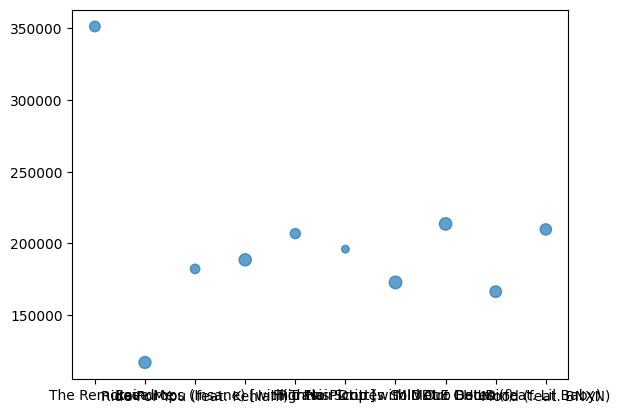

In [29]:
import matplotlib.pyplot as plt
import numpy as np

    
x = reco_df['name']
y = reco_df['duration_ms']
s = reco_df['popularity']
    
plt.scatter(x, y, s, alpha=0.7) # c=reco_df['explicit']
# show the graph
plt.show()

In [30]:
reco_df['duration_min'] = round(reco_df['duration_ms'] / 1000, 0)

/tmp/ipykernel_772044/1959306096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reco_df['duration_min'] = round(reco_df['duration_ms'] / 1000, 0)


In [31]:
reco_df["popularity_range"] = reco_df["popularity"] - (reco_df['popularity'].min() - 1)

/tmp/ipykernel_772044/3481783179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reco_df["popularity_range"] = reco_df["popularity"] - (reco_df['popularity'].min() - 1)


In [32]:
reco_df

,name,explicit,duration_ms,popularity,duration_min,popularity_range
0,The Remorse,True,351220,58,351.0,29
1,Love Me,True,117013,75,117.0,46
2,Ride For You (feat. Kehlani),True,182250,46,182.0,17
3,Raindrops (Insane) [with Travis Scott],True,188586,77,189.0,48
4,Flights,True,206837,53,207.0,24
5,No Pictures,True,196005,30,196.0,1
6,Ric Flair Drip (with Metro Boomin),True,172800,82,173.0,53
7,MIDDLE CHILD,True,213593,80,214.0,51
8,Sold Out Dates (feat. Lil Baby),True,166368,69,166.0,40
9,Mood (feat. BNXN),False,209760,66,210.0,37


In [49]:
# Try:
#reco_df["popularity"] - (reco_df['popularity'].min() - 1)

In [33]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


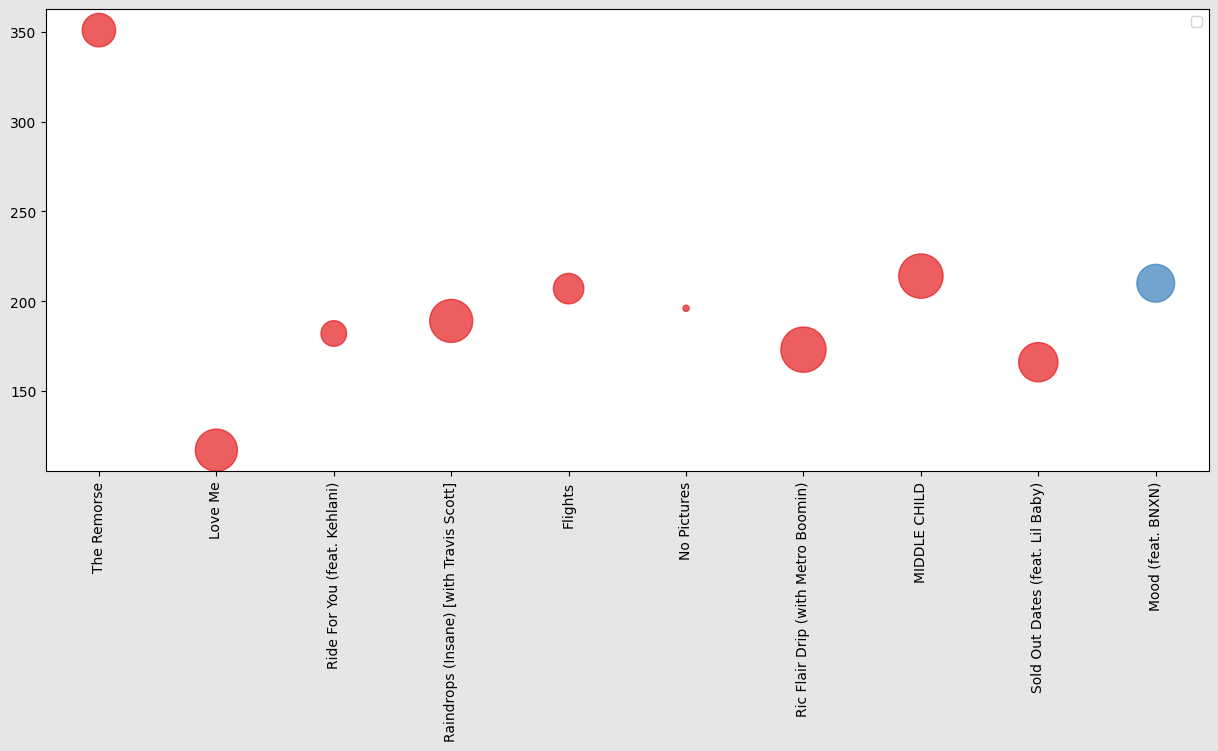

In [34]:
plt.figure(figsize=(15, 6), facecolor=(.9, .9, .9))    

x = reco_df['name']
y = reco_df['duration_min']
s = reco_df['popularity_range']*20
    
color_labels = reco_df['explicit'].unique()
rgb_values = sns.color_palette("Set1", 8)
color_map = dict(zip(color_labels, rgb_values))

plt.scatter(x, y, s, alpha=0.7, c=reco_df['explicit'].map(color_map))
plt.xticks(rotation=90)
plt.legend()
# show the graph
plt.show()